### Note:
The purpose of this notebooks is to take a look at some preprocessing.  Specifically, that of VGG16.

##### What does VGG16 preprocessing do?

First, the input image is converted from RGBA to BGR.  Then, the mean channel values (R, G, B) based on the imageNet dataset are subtracted from every pixel.  Then the data is essentially normalized: pixels go from the range [0, 255] to [0, 1.0]

In [1]:
# Appropriate Imports:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.applications import vgg16

In [2]:
# Setting Globals:
source_directory = '/Users/johnmays/Documents/Wirth Lab/still_data/Post-Hinc_small_dasets/Post-Hinc_256_256/01/'

### Previewing a few images

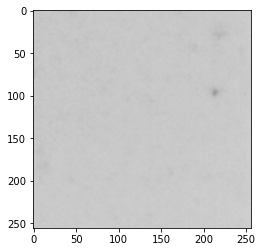

080521_image__10_256_cropped_90_15.tif
Norm: 51329.28171131951


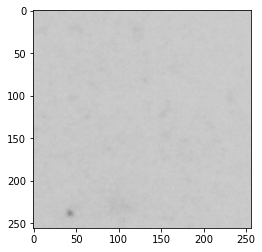

080921_image__55_256_cropped_180_17.tif
Norm: 51265.84292684556


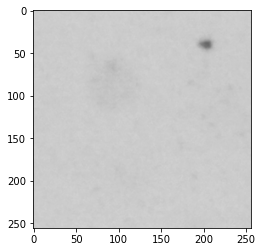

080921_image__92_256_cropped_0_8.tif
Norm: 51894.77254984359


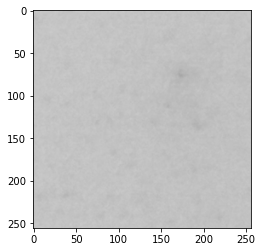

080521_image__10_256_cropped_180_1.tif
Norm: 49628.14201640033


In [3]:
os.chdir(source_directory)
filenames = os.listdir(source_directory)
for i in range(4):
    filename = filenames[i]
    img = imread(filename)
    img = np.array(img)
    plt.imshow(img)
    plt.show()
    imnorm = (np.linalg.norm(x=img[:, :, 0], ord='fro') + np.linalg.norm(x=img[:, :, 1], ord='fro') + np.linalg.norm(x=img[:, :, 2], ord='fro'))/3
    # imnorm = (np.linalg.norm(x=img[:, :, 0], ord='fro') + np.linalg.norm(x=img[:, :, 1], ord='fro') + np.linalg.norm(x=img[:, :, 2], ord='fro'))/((3/4)*np.size(img))
    print(filename)
    print("Norm: " + str(imnorm))

### Seeing what they look like with VGG16 preprocessing:

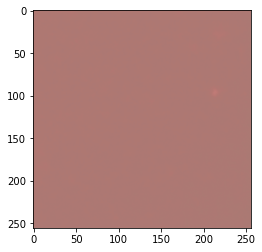

080521_image__10_256_cropped_90_15.tif
Norm: 26543.986857686217


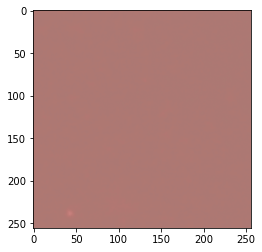

080921_image__55_256_cropped_180_17.tif
Norm: 26502.219918735547


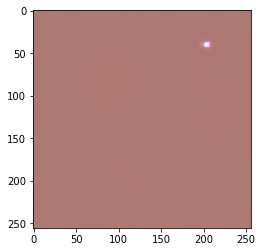

080921_image__92_256_cropped_0_8.tif
Norm: 26963.72840322531


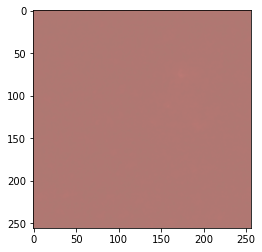

080521_image__10_256_cropped_180_1.tif
Norm: 25412.022236621222


In [4]:
os.chdir(source_directory)
filenames = os.listdir(source_directory)
for i in range(4):
    filename = filenames[i]
    img = imread(filename)
    img = vgg16.preprocess_input(img)
    img = np.uint8(img)
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()
    imnorm = (np.linalg.norm(x=img[:, :, 0], ord='fro') + np.linalg.norm(x=img[:, :, 1], ord='fro') + np.linalg.norm(x=img[:, :, 2], ord='fro'))/3
    # imnorm = (np.linalg.norm(x=img[:, :, 0], ord='fro') + np.linalg.norm(x=img[:, :, 1], ord='fro') + np.linalg.norm(x=img[:, :, 2], ord='fro'))/((3/4)*np.size(img))
    print(filename)
    print("Norm: " + str(imnorm))

In [5]:
def highlight_blank_pixels(img, thresh=(2,2,2)):
    for i in range(len(img[0, :, 0])):
        for j in range(len(img[:, 0, 0])):
            if img[i][j][0] >= thresh[0] and img[i][j][1] >= thresh[1] and img[i][j][2] >= thresh[2]:
                img[i][j][0] = 0
                img[i][j][1] = 0
                img[i][j][2] = 0
            # in other words, if a pixel is over the threshold, make it black
    return img

### How much information is being lost through VGG16 preprocessing?
Here, I've turned any pixel that is totally white into a pixel that is totally black to highlight information loss:

Original Image:


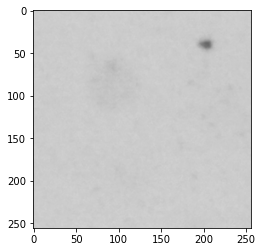

Post-preprocessing:


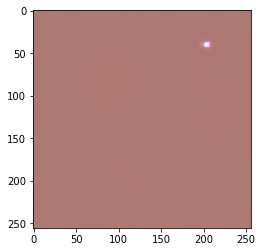

After scanning for pixel differences:


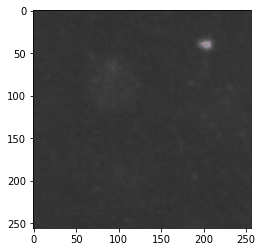

In [6]:
print("Original Image:")
img1 = imread('080921_image__92_256_cropped_0_8.tif')
plt.imshow(img1)
plt.show()

print("Post-preprocessing:")
img1 = vgg16.preprocess_input(img1)
img1 = np.uint8(img1)
plt.imshow(img1)
plt.show()

print("After scanning for pixel differences:")
img1 = highlight_blank_pixels(img1)
plt.imshow(img1)
plt.show()

#### Conclusion: VGG16 may be useful

Just for fun:

In [7]:
img = preprocessing.image.load_img('080921_image__92_256_cropped_0_8.tif', target_size=(224, 224))
img = preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = vgg16.preprocess_input(img)

model = vgg16.VGG16()

In [8]:
# from keras.applications.vgg16 import decode_predictions
# features = model.predict(img)
# convert the probabilities to class labels
# label = decode_predictions(features)
# retrieve the most likely result, e.g. highest probability
# label = label[0][0]
# print the classification
# print(label[1])

##### llama

### Writing my own preprocessing function:

In [9]:
def custom_preprocessing(img):
    # will have to optimize for
    # first, find means per channel:
    img = np.copy(img)
    r_sum = 0
    g_sum = 0
    b_sum = 0
    for i in range(len(img[0, :, 0])):
        for j in range(len(img[:, 0, 0])):
            r_sum += img[i][j][0]
            g_sum += img[i][j][1]
            b_sum += img[i][j][2]

    r_mean = r_sum/(np.size(img)/4)
    g_mean = g_sum/(np.size(img)/4)
    b_mean = b_sum/(np.size(img)/4)
    print(r_mean)

    # then, subtract the means from every pixel value
    for i in range(len(img[0, :, 0])):
        for j in range(len(img[:, 0, 0])):
            """
            if img[i][j][0] - r_mean < 0:
                img[i][j][0] = 0
            else:
               img[i][j][0] -= r_mean 
            if img[i][j][1] - g_mean < 0:
                img[i][j][1] = 0
            else:
               img[i][j][1] -= g_mean
            if img[i][j][2] - b_mean < 0:
                img[i][j][2] = 0
            else:
               img[i][j][2] -= b_mean 
            """
            img[i][j][0] -= r_mean
            img[i][j][1] -= g_mean
            img[i][j][2] -= b_mean
    return img

Using my preprocessing function
202.66952514648438


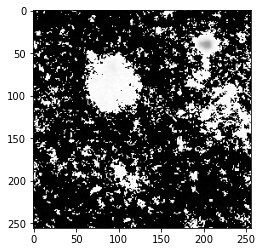

In [10]:
img1 = imread('080921_image__92_256_cropped_0_8.tif')
print("Using my preprocessing function")
img1 = custom_preprocessing(img1)
# img1 = np.uint8(img1)
# print(img1)
plt.imshow(img1)
plt.show()

##### Notes:
- increase contrast by scaling sigma of distribution
- check for bit rollover
- graph intensity distributions